In [81]:
import pandas as pd

df = pd.read_csv('game_scores_homepage.csv')

In [4]:
df

,날짜,요일,경기시간,장소,팀1명,팀2명,홈/원정,게임결과,팀1 점수,팀2 점수,...,팀2 3이닝점수,팀2 4이닝점수,팀2 5이닝점수,팀2 6이닝점수,팀2 7이닝점수,팀2 8이닝점수,팀2 9이닝점수,팀2 10이닝점수,팀2 11이닝점수,팀2 12이닝점수
0,2024-03-23,(토),14:00,잠실,한화,LG,원정,패,2,8,...,0,1,0,-,-,-,-,-,-,-
1,2024-03-24,(일),14:00,잠실,한화,LG,원정,승,8,4,...,4,0,1,2,-,-,-,-,-,-
2,2024-03-26,(화),18:30,문학,한화,SSG,원정,승,6,0,...,2,0,0,0,-,-,-,-,-,-
3,2024-03-27,(수),18:30,문학,한화,SSG,원정,승,3,1,...,0,0,0,0,-,-,-,-,-,-
4,2024-03-28,(목),18:30,문학,한화,SSG,원정,승,10,6,...,0,1,1,0,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2024-09-24,(화),18:30,고척,한화,키움,원정,패,4,5,...,0,2,0,-,-,-,-,-,-,-
140,2024-09-25,(수),18:30,잠실,한화,LG,원정,승,4,2,...,0,0,0,0,-,-,-,-,-,-
141,2024-09-27,(금),18:30,대전,KIA,한화,홈,승,0,8,...,0,3,0,-,-,-,-,-,-,-
142,2024-09-28,(토),17:00,대전,SSG,한화,홈,패,6,2,...,2,0,0,0,-,-,-,-,-,-


### 각 팀별 성적비교

In [5]:
df['팀1명'].value_counts()

팀1명
한화     73
KIA     9
NC      9
LG      9
키움      9
KT      7
두산      7
삼성      7
롯데      7
SSG     7
Name: count, dtype: int64

In [6]:
KIA = df[(df['팀1명'] == 'KIA') | (df['팀2명'] == 'KIA')]
LG = df[(df['팀1명'] == 'LG') | (df['팀2명'] == 'LG')]
SSG = df[(df['팀1명'] == 'SSG') | (df['팀2명'] == 'SSG')]
NC = df[(df['팀1명'] == 'NC') | (df['팀2명'] == 'NC')]
KT = df[(df['팀1명'] == 'KT') | (df['팀2명'] == 'KT')]
두산 = df[(df['팀1명'] == '두산') | (df['팀2명'] == '두산')]
롯데 = df[(df['팀1명'] == '롯데') | (df['팀2명'] == '롯데')]
삼성 = df[(df['팀1명'] == '삼성') | (df['팀2명'] == '삼성')]
키움 = df[(df['팀1명'] == '키움') | (df['팀2명'] == '키움')]


In [7]:
print("KIA",KIA['게임결과'].value_counts())
print("LG",LG['게임결과'].value_counts())
print("SSG",SSG['게임결과'].value_counts())
print("NC",NC['게임결과'].value_counts())
print("KT",KT['게임결과'].value_counts())
print("두산",두산['게임결과'].value_counts())
print("롯데",롯데['게임결과'].value_counts())
print("삼성",삼성['게임결과'].value_counts())
print("키움",키움['게임결과'].value_counts())


KIA 게임결과
패    11
승     5
Name: count, dtype: int64
LG 게임결과
패    8
승    8
Name: count, dtype: int64
SSG 게임결과
승    10
패     6
Name: count, dtype: int64
NC 게임결과
패    10
승     4
무     2
Name: count, dtype: int64
KT 게임결과
승    10
패     6
Name: count, dtype: int64
두산 게임결과
승    10
패     6
Name: count, dtype: int64
롯데 게임결과
패    9
승    7
Name: count, dtype: int64
삼성 게임결과
패    10
승     6
Name: count, dtype: int64
키움 게임결과
패    10
승     6
Name: count, dtype: int64


### 홈원정 비교

In [17]:
home_results = df[df['홈/원정'] == '홈']['게임결과'].value_counts()
away_results = df[df['홈/원정'] == '원정']['게임결과'].value_counts()

print("홈",home_results,"원정",away_results)

홈 게임결과
패    39
승    30
무     2
Name: count, dtype: int64 원정 게임결과
패    37
승    36
Name: count, dtype: int64


In [18]:
home = df[df['홈/원정'] == '홈']
away = df[df['홈/원정'] == '원정']

In [19]:
# 홈 승리 수와 총 경기 수
home_wins = home[home['게임결과'] == '승'].shape[0]
home_total = home.shape[0]
home_win_rate = (home_wins / home_total) * 100 if home_total > 0 else 0

# 원정 승리 수와 총 경기 수
away_wins = away[away['게임결과'] == '승'].shape[0]
away_total = away.shape[0]
away_win_rate = (away_wins / away_total) * 100 if away_total > 0 else 0

# 결과 출력
print(f"홈 승률: {home_win_rate:.2f}%")
print(f"원정 승률: {away_win_rate:.2f}%")

홈 승률: 42.25%
원정 승률: 49.32%


In [8]:
home_results_KIA = KIA[KIA['홈/원정'] == '홈']['게임결과'].value_counts()
away_results_KIA = KIA[KIA['홈/원정'] == '원정']['게임결과'].value_counts()

print("홈",home_results_KIA,"원정",away_results_KIA)

홈 게임결과
패    7
승    2
Name: count, dtype: int64 원정 게임결과
패    4
승    3
Name: count, dtype: int64


In [9]:
home_results_NC = NC[NC['홈/원정'] == '홈']['게임결과'].value_counts()
away_results_NC = NC[NC['홈/원정'] == '원정']['게임결과'].value_counts()

print("홈",home_results_NC,"원정",away_results_NC)

홈 게임결과
패    6
무    2
승    1
Name: count, dtype: int64 원정 게임결과
패    4
승    3
Name: count, dtype: int64


In [10]:
home_results_SSG = SSG[SSG['홈/원정'] == '홈']['게임결과'].value_counts()
away_results_SSG = SSG[SSG['홈/원정'] == '원정']['게임결과'].value_counts()

print("홈",home_results_SSG,"원정",away_results_SSG)

홈 게임결과
패    5
승    2
Name: count, dtype: int64 원정 게임결과
승    8
패    1
Name: count, dtype: int64


In [11]:
home_results_KT = KT[KT['홈/원정'] == '홈']['게임결과'].value_counts()
away_results_KT = KT[KT['홈/원정'] == '원정']['게임결과'].value_counts()

print("홈",home_results_KT,"원정",away_results_KT)

홈 게임결과
승    4
패    3
Name: count, dtype: int64 원정 게임결과
승    6
패    3
Name: count, dtype: int64


In [12]:
home_results_두산 = 두산[두산['홈/원정'] == '홈']['게임결과'].value_counts()
away_results_두산 = 두산[두산['홈/원정'] == '원정']['게임결과'].value_counts()

print("홈",home_results_두산,"원정",away_results_두산)

홈 게임결과
승    4
패    3
Name: count, dtype: int64 원정 게임결과
승    6
패    3
Name: count, dtype: int64


### 전반기 후반기 성적비교

In [13]:
df['날짜'] = pd.to_datetime(df['날짜'])

# 3월부터 6월까지 (전반기) 데이터프레임
before = df[(df['날짜'].dt.month >= 3) & (df['날짜'].dt.month <= 6)]

# 7월부터 9월까지 (후반기) 데이터프레임
after = df[(df['날짜'].dt.month >= 7) & (df['날짜'].dt.month <= 9)]

In [14]:
before.head()

,날짜,요일,경기시간,장소,팀1명,팀2명,홈/원정,게임결과,팀1 점수,팀2 점수,...,팀2 3이닝점수,팀2 4이닝점수,팀2 5이닝점수,팀2 6이닝점수,팀2 7이닝점수,팀2 8이닝점수,팀2 9이닝점수,팀2 10이닝점수,팀2 11이닝점수,팀2 12이닝점수
0,2024-03-23,(토),14:00,잠실,한화,LG,원정,패,2,8,...,0,1,0,-,-,-,-,-,-,-
1,2024-03-24,(일),14:00,잠실,한화,LG,원정,승,8,4,...,4,0,1,2,-,-,-,-,-,-
2,2024-03-26,(화),18:30,문학,한화,SSG,원정,승,6,0,...,2,0,0,0,-,-,-,-,-,-
3,2024-03-27,(수),18:30,문학,한화,SSG,원정,승,3,1,...,0,0,0,0,-,-,-,-,-,-
4,2024-03-28,(목),18:30,문학,한화,SSG,원정,승,10,6,...,0,1,1,0,-,-,-,-,-,-


In [15]:
after.head()

,날짜,요일,경기시간,장소,팀1명,팀2명,홈/원정,게임결과,팀1 점수,팀2 점수,...,팀2 3이닝점수,팀2 4이닝점수,팀2 5이닝점수,팀2 6이닝점수,팀2 7이닝점수,팀2 8이닝점수,팀2 9이닝점수,팀2 10이닝점수,팀2 11이닝점수,팀2 12이닝점수
79,2024-07-02,(화),18:30,대전,KT,한화,홈,패,6,5,...,0,0,0,0,0,0,3,2,-,-
80,2024-07-03,(수),18:30,대전,KT,한화,홈,패,3,2,...,1,2,0,0,-,-,-,-,-,-
81,2024-07-04,(목),18:30,대전,KT,한화,홈,승,5,13,...,0,0,0,-,-,-,-,-,-,-
82,2024-07-09,(화),18:30,고척,한화,키움,원정,패,3,5,...,0,3,0,-,-,-,-,-,-,-
83,2024-07-10,(수),18:30,고척,한화,키움,원정,승,7,0,...,2,0,0,0,-,-,-,-,-,-


In [16]:
# 전반기 승리 수와 총 경기 수
before_wins = before[before['게임결과'] == '승'].shape[0]
before_total = before.shape[0]
before_win_rate = (before_wins / before_total) * 100 if before_total > 0 else 0

# 후반기 승리 수와 총 경기 수
after_wins = after[after['게임결과'] == '승'].shape[0]
after_total = after.shape[0]
after_win_rate = (after_wins / after_total) * 100 if after_total > 0 else 0

# 결과 출력
print(f"전반기 승률: {before_win_rate:.2f}%")
print(f"후반기 승률: {after_win_rate:.2f}%")

전반기 승률: 44.30%
후반기 승률: 47.69%


### 경기별 출루율

In [104]:
hitter_df = pd.read_csv('data/hitter_hanhwa.csv')

In [105]:
hitter_df.head()

,날짜,선수명,타석,타수,득점,안타,홈런,타점,도루,희타,사사구,삼진
0,2024-03-23,문현빈,4,3,1,0,0,0,0,0,1,0
1,2024-03-23,페라자,4,4,0,2,0,1,0,0,0,2
2,2024-03-23,하주석,3,3,1,1,0,0,0,0,0,1
3,2024-03-23,김태연,1,1,0,0,0,0,0,0,0,0
4,2024-03-23,정은원,4,4,0,0,0,0,0,0,0,0


In [106]:
# 타자 출루율(OBP) 계산
hitter_df['타자출루율'] = (hitter_df['안타'] + hitter_df['사사구'] + hitter_df['희타']) / (hitter_df['타수'] + hitter_df['사사구'] + hitter_df['희타'] + hitter_df['삼진'])

# NaN 값을 0으로 대체
hitter_df['타자출루율'] = hitter_df['타자출루율'].fillna(0)

In [85]:
# 날짜별로 그룹화하여 각 날짜의 선수들의 출루율 평균 계산
daily_avg_obp = hitter_df.groupby('날짜')['타자출루율'].mean().reset_index()

In [86]:
daily_avg_obp

,날짜,타자출루율
0,2024-03-23,0.218333
1,2024-03-24,0.366667
2,2024-03-26,0.184722
3,2024-03-27,0.241667
4,2024-03-28,0.453846
...,...,...
138,2024-09-24,0.256667
139,2024-09-25,0.253333
140,2024-09-27,0.280000
141,2024-09-28,0.217262


#### 더블헤더 따로계산

In [87]:
print(hitter_df[hitter_df['날짜']=='2024-06-23'])

             날짜  선수명  타석  타수  득점  안타  홈런  타점  도루  희타  사사구  삼진     타자출루율
890  2024-06-23  페라자   5   5   1   1   0   0   0   0    0   0  0.200000
891  2024-06-23  황영묵   0   0   0   0   0   0   0   0    0   0  0.000000
892  2024-06-23  이도윤   5   2   0   0   0   1   0   1    2   0  0.600000
893  2024-06-23  김태연   5   4   2   2   1   2   0   0    1   0  0.600000
894  2024-06-23  장진혁   5   4   1   1   0   1   0   0    1   2  0.285714
895  2024-06-23  이원석   6   6   1   2   0   1   1   0    0   2  0.250000
896  2024-06-23  노시환   5   4   1   1   0   1   0   0    1   1  0.333333
897  2024-06-23  김강민   0   0   0   0   0   0   0   0    0   0  0.000000
898  2024-06-23  최재훈   5   4   0   0   0   0   0   0    1   0  0.200000
899  2024-06-23  채은성   5   4   2   3   1   3   0   0    1   0  0.800000
900  2024-06-23  안치홍   5   4   1   2   0   0   0   0    1   0  0.600000
901  2024-06-23  임종찬   0   0   0   0   0   0   0   0    0   0  0.000000
902  2024-06-23  최인호   1   1   0   0   0   0   0   0    0   0  0

In [88]:
df_20240623 = hitter_df[hitter_df['날짜']=='2024-06-23']

In [89]:
df_20240623

,날짜,선수명,타석,타수,득점,안타,홈런,타점,도루,희타,사사구,삼진,타자출루율
890,2024-06-23,페라자,5,5,1,1,0,0,0,0,0,0,0.200000
891,2024-06-23,황영묵,0,0,0,0,0,0,0,0,0,0,0.000000
892,2024-06-23,이도윤,5,2,0,0,0,1,0,1,2,0,0.600000
893,2024-06-23,김태연,5,4,2,2,1,2,0,0,1,0,0.600000
894,2024-06-23,장진혁,5,4,1,1,0,1,0,0,1,2,0.285714
895,2024-06-23,이원석,6,6,1,2,0,1,1,0,0,2,0.250000
896,2024-06-23,노시환,5,4,1,1,0,1,0,0,1,1,0.333333
897,2024-06-23,김강민,0,0,0,0,0,0,0,0,0,0,0.000000
898,2024-06-23,최재훈,5,4,0,0,0,0,0,0,1,0,0.200000
899,2024-06-23,채은성,5,4,2,3,1,3,0,0,1,0,0.800000


In [90]:
#슬라이싱 안되서 index reset

df_20240623.reset_index(drop=True)

,날짜,선수명,타석,타수,득점,안타,홈런,타점,도루,희타,사사구,삼진,타자출루율
0,2024-06-23,페라자,5,5,1,1,0,0,0,0,0,0,0.200000
1,2024-06-23,황영묵,0,0,0,0,0,0,0,0,0,0,0.000000
2,2024-06-23,이도윤,5,2,0,0,0,1,0,1,2,0,0.600000
3,2024-06-23,김태연,5,4,2,2,1,2,0,0,1,0,0.600000
4,2024-06-23,장진혁,5,4,1,1,0,1,0,0,1,2,0.285714
5,2024-06-23,이원석,6,6,1,2,0,1,1,0,0,2,0.250000
6,2024-06-23,노시환,5,4,1,1,0,1,0,0,1,1,0.333333
7,2024-06-23,김강민,0,0,0,0,0,0,0,0,0,0,0.000000
8,2024-06-23,최재훈,5,4,0,0,0,0,0,0,1,0,0.200000
9,2024-06-23,채은성,5,4,2,3,1,3,0,0,1,0,0.800000


In [91]:
# 각 구간별로 출루율 평균 계산
avg_obp_1 = df_20240623.iloc[0:11]['타자출루율'].mean()
avg_obp_2 = df_20240623.iloc[11:25]['타자출루율'].mean()

# 결과 출력
print("구간 890~900 평균 출루율:", avg_obp_1)
print("구간 901~914 평균 출루율:", avg_obp_2)

구간 890~900 평균 출루율: 0.35173160173160173
구간 901~914 평균 출루율: 0.22023809523809526


### 타자평균율 추가

In [92]:
# daily_avg_obp에서 '날짜'와 '타자출루율'만 추출하여 딕셔너리로 변환
move_obp = daily_avg_obp.set_index('날짜')['타자출루율'].to_dict()

# df['날짜']에 대응하는 타자출루율 값을 df['타자평균출루율']에 추가
df['타자평균출루율'] = df['날짜'].map(move_obp)

df

,날짜,요일,경기시간,장소,팀1명,팀2명,홈/원정,게임결과,팀1 점수,팀2 점수,...,팀2 4이닝점수,팀2 5이닝점수,팀2 6이닝점수,팀2 7이닝점수,팀2 8이닝점수,팀2 9이닝점수,팀2 10이닝점수,팀2 11이닝점수,팀2 12이닝점수,타자평균출루율
0,2024-03-23,(토),14:00,잠실,한화,LG,원정,패,2,8,...,1,0,-,-,-,-,-,-,-,0.218333
1,2024-03-24,(일),14:00,잠실,한화,LG,원정,승,8,4,...,0,1,2,-,-,-,-,-,-,0.366667
2,2024-03-26,(화),18:30,문학,한화,SSG,원정,승,6,0,...,0,0,0,-,-,-,-,-,-,0.184722
3,2024-03-27,(수),18:30,문학,한화,SSG,원정,승,3,1,...,0,0,0,-,-,-,-,-,-,0.241667
4,2024-03-28,(목),18:30,문학,한화,SSG,원정,승,10,6,...,1,1,0,-,-,-,-,-,-,0.453846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2024-09-24,(화),18:30,고척,한화,키움,원정,패,4,5,...,2,0,-,-,-,-,-,-,-,0.256667
140,2024-09-25,(수),18:30,잠실,한화,LG,원정,승,4,2,...,0,0,0,-,-,-,-,-,-,0.253333
141,2024-09-27,(금),18:30,대전,KIA,한화,홈,승,0,8,...,3,0,-,-,-,-,-,-,-,0.280000
142,2024-09-28,(토),17:00,대전,SSG,한화,홈,패,6,2,...,0,0,0,-,-,-,-,-,-,0.217262


#### 더블헤더 수동부여

In [93]:
print(df[df['날짜']== '2024-06-23'])

            날짜   요일   경기시간  장소 팀1명  팀2명 홈/원정 게임결과  팀1 점수  팀2 점수  ...  \
73  2024-06-23  (일)  14:00  광주  한화  KIA   원정    승      9      8  ...   
74  2024-06-23  (일)  18:11  광주  한화  KIA   원정    패      1      4  ...   

    팀2 4이닝점수  팀2 5이닝점수  팀2 6이닝점수  팀2 7이닝점수  팀2 8이닝점수  팀2 9이닝점수  팀2 10이닝점수  \
73         0         1         0         -         -         -          -   
74         0         0         -         -         -         -          -   

    팀2 11이닝점수  팀2 12이닝점수   타자평균출루율  
73          -          -  0.278095  
74          -          -  0.278095  

[2 rows x 35 columns]


In [94]:
# 특정 인덱스의 특정 열 수정
df.at[73, '타자평균출루율'] = avg_obp_1


In [95]:
df.at[74, '타자평균출루율'] = avg_obp_2

In [96]:
print(df[df['날짜']== '2024-06-23'])

            날짜   요일   경기시간  장소 팀1명  팀2명 홈/원정 게임결과  팀1 점수  팀2 점수  ...  \
73  2024-06-23  (일)  14:00  광주  한화  KIA   원정    승      9      8  ...   
74  2024-06-23  (일)  18:11  광주  한화  KIA   원정    패      1      4  ...   

    팀2 4이닝점수  팀2 5이닝점수  팀2 6이닝점수  팀2 7이닝점수  팀2 8이닝점수  팀2 9이닝점수  팀2 10이닝점수  \
73         0         1         0         -         -         -          -   
74         0         0         -         -         -         -          -   

    팀2 11이닝점수  팀2 12이닝점수   타자평균출루율  
73          -          -  0.351732  
74          -          -  0.220238  

[2 rows x 35 columns]


In [99]:
# '승패' 열을 수치형 값으로 변환
df['승패수치형변환'] = df['게임결과'].map({'승': 1, '패': 0})

# 상관관계 계산 (피어슨 상관계수)
correlation = df[['승패수치형변환', '타자평균출루율']].corr()

print(correlation)

          승패수치형변환   타자평균출루율
승패수치형변환  1.000000  0.393943
타자평균출루율  0.393943  1.000000


In [119]:
hitter_df_Sum = hitter_df.groupby('날짜').sum().reset_index()
hitter_df_Sum = hitter_df_Sum.drop(['선수명', '타자출루율'], axis=1)

In [120]:
hitter_df_Sum

,날짜,타석,타수,득점,안타,홈런,타점,도루,희타,사사구,삼진
0,2024-03-23,35,32,2,7,0,2,0,0,3,6
1,2024-03-24,38,34,8,11,3,8,0,1,4,7
2,2024-03-26,37,33,6,6,1,6,1,0,4,8
3,2024-03-27,37,26,3,2,0,2,1,2,9,8
4,2024-03-28,47,35,10,15,1,10,1,2,10,3
...,...,...,...,...,...,...,...,...,...,...,...
138,2024-09-24,39,35,4,9,1,4,1,0,4,5
139,2024-09-25,38,36,4,11,0,4,1,0,2,4
140,2024-09-27,40,36,8,13,1,7,0,0,4,5
141,2024-09-28,38,33,2,5,0,2,0,0,5,13


In [121]:
df_selected = df[['날짜', '타자평균출루율', '게임결과']]

hitter_df_Sum = pd.merge(hitter_df_Sum, df_selected, on='날짜', how='left')

hitter_df_Sum

,날짜,타석,타수,득점,안타,홈런,타점,도루,희타,사사구,삼진,타자평균출루율,게임결과
0,2024-03-23,35,32,2,7,0,2,0,0,3,6,0.218333,패
1,2024-03-24,38,34,8,11,3,8,0,1,4,7,0.366667,승
2,2024-03-26,37,33,6,6,1,6,1,0,4,8,0.184722,승
3,2024-03-27,37,26,3,2,0,2,1,2,9,8,0.241667,승
4,2024-03-28,47,35,10,15,1,10,1,2,10,3,0.453846,승
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2024-09-24,39,35,4,9,1,4,1,0,4,5,0.256667,패
140,2024-09-25,38,36,4,11,0,4,1,0,2,4,0.253333,승
141,2024-09-27,40,36,8,13,1,7,0,0,4,5,0.280000,승
142,2024-09-28,38,33,2,5,0,2,0,0,5,13,0.217262,패


In [131]:
hitter_df_Sum.to_csv('타자상관관계_계산.csv')

c:\Users\82102\anaconda3\envs\nof\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\82102\anaconda3\envs\nof\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


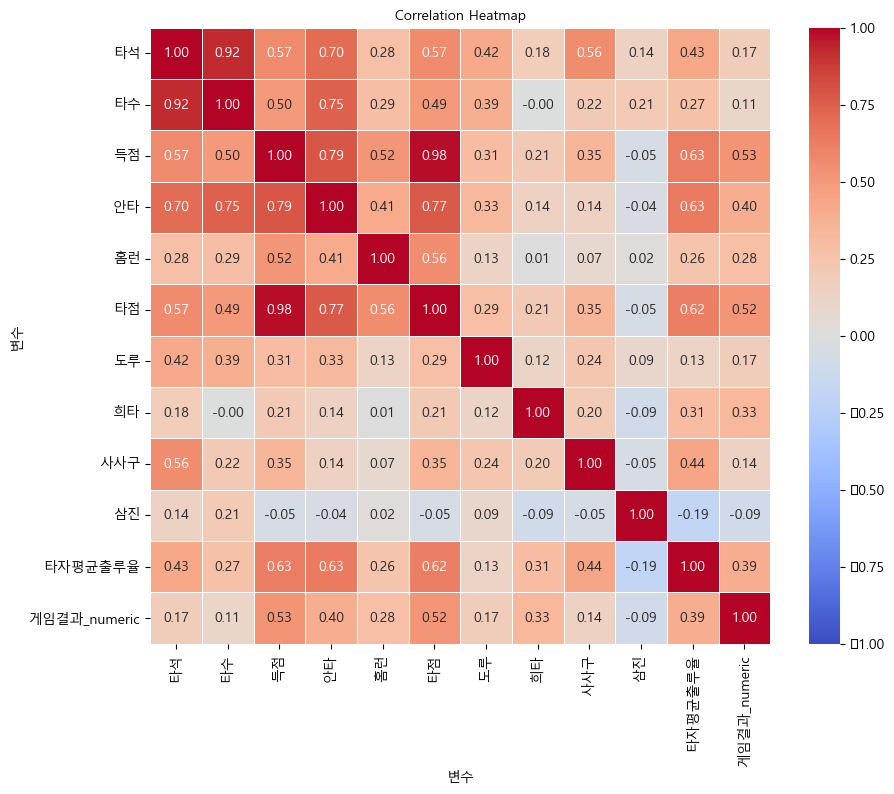

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows의 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 시스템에 맞는 한글 폰트를 선택해주세요
fontprop = fm.FontProperties(fname=font_path)

# matplotlib에서 한글이 깨지지 않도록 설정
plt.rcParams['font.family'] = fontprop.get_name()

# '게임결과'를 1(승)과 0(패)로 변환
hitter_df_Sum['게임결과_numeric'] = hitter_df_Sum['게임결과'].map({'승': 1, '패': 0})

# 상관계수 계산
numeric_cols = hitter_df_Sum.select_dtypes(include='number').columns
correlation = hitter_df_Sum[numeric_cols].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# 폰트 설정
plt.title("Correlation Heatmap", fontproperties=fontprop)
plt.xlabel("변수", fontproperties=fontprop)
plt.ylabel("변수", fontproperties=fontprop)
plt.show()

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         144 non-null    object 
 1   요일         144 non-null    object 
 2   경기시간       144 non-null    object 
 3   장소         144 non-null    object 
 4   팀1명        144 non-null    object 
 5   팀2명        144 non-null    object 
 6   홈/원정       144 non-null    object 
 7   게임결과       144 non-null    object 
 8   팀1 점수      144 non-null    int64  
 9   팀2 점수      144 non-null    int64  
 10  팀1 1이닝점수   144 non-null    int64  
 11  팀1 2이닝점수   144 non-null    int64  
 12  팀1 3이닝점수   144 non-null    int64  
 13  팀1 4이닝점수   144 non-null    int64  
 14  팀1 5이닝점수   144 non-null    int64  
 15  팀1 6이닝점수   144 non-null    int64  
 16  팀1 7이닝점수   144 non-null    int64  
 17  팀1 8이닝점수   144 non-null    int64  
 18  팀1 9이닝점수   144 non-null    int64  
 19  팀1 10이닝점수  144 non-null    int64  
 20  팀1 11이닝점수 

### 한화이닝점수, 상대팀이닝점수로 분리

In [136]:
# '팀명1'이 '한화'인 데이터 필터링
filtered_df1 = df[df['팀1명'] == '한화'][['날짜', '게임결과', '팀1 1이닝점수', '팀1 2이닝점수', '팀1 3이닝점수','팀1 4이닝점수',
                                      '팀1 5이닝점수','팀1 6이닝점수','팀1 7이닝점수','팀1 8이닝점수','팀1 9이닝점수',
                                      '팀1 10이닝점수','팀1 11이닝점수','팀1 12이닝점수']]

In [160]:
# '팀명1'이 '한화'이 아닌 데이터 필터링
other_df1 = df[df['팀1명'] != '한화'][['날짜', '게임결과', '팀1 1이닝점수', '팀1 2이닝점수', '팀1 3이닝점수','팀1 4이닝점수',
                                      '팀1 5이닝점수','팀1 6이닝점수','팀1 7이닝점수','팀1 8이닝점수','팀1 9이닝점수',
                                      '팀1 10이닝점수','팀1 11이닝점수','팀1 12이닝점수']]

In [143]:
# 열 이름을 간소화 (1이닝점수, 2이닝점수, ...)
filtered_df1 = filtered_df1.rename(columns={f'팀1 {i}이닝점수': f'{i}이닝점수' for i in range(1, 13)})

In [161]:
# 열 이름을 간소화 (1이닝점수, 2이닝점수, ...)
other_df1 = other_df1.rename(columns={f'팀1 {i}이닝점수': f'{i}이닝점수' for i in range(1, 13)})

In [144]:
filtered_df1

,날짜,게임결과,1이닝점수,2이닝점수,3이닝점수,4이닝점수,5이닝점수,6이닝점수,7이닝점수,8이닝점수,9이닝점수,10이닝점수,11이닝점수,12이닝점수
0,2024-03-23,패,0,0,0,2,1,0,1,3,0,1,0,0
1,2024-03-24,승,0,0,0,0,0,1,1,0,1,0,1,0
2,2024-03-26,승,0,0,0,0,0,0,0,0,4,0,0,0
3,2024-03-27,승,1,0,0,0,0,0,1,0,0,0,0,1
4,2024-03-28,승,0,0,0,0,2,0,0,0,5,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2024-09-17,승,0,0,0,0,0,0,0,0,2,0,0,0
135,2024-09-18,패,1,2,1,0,0,0,0,0,0,3,0,0
136,2024-09-19,승,2,4,3,0,1,0,0,0,0,0,1,1
139,2024-09-24,패,0,0,0,0,1,0,0,0,1,3,0,0


In [163]:
other_df1

,날짜,게임결과,1이닝점수,2이닝점수,3이닝점수,4이닝점수,5이닝점수,6이닝점수,7이닝점수,8이닝점수,9이닝점수,10이닝점수,11이닝점수,12이닝점수
5,2024-03-29,승,0,2,0,0,0,0,0,0,0,0,2,0
6,2024-03-30,승,0,0,0,0,0,4,0,1,2,1,1,0
7,2024-03-31,승,0,0,0,7,0,4,1,0,0,0,0,0
8,2024-04-02,패,0,0,0,0,0,0,0,0,0,0,0,0
9,2024-04-04,승,0,0,0,0,1,0,1,1,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2024-09-22,승,1,0,0,0,2,0,0,0,0,1,1,0
138,2024-09-23,패,0,0,0,0,0,0,0,0,1,0,0,0
141,2024-09-27,승,0,0,0,0,0,0,0,2,0,1,0,0
142,2024-09-28,패,0,2,1,0,1,0,1,0,0,0,0,0


In [148]:
# '팀명2'이 '한화'인 데이터 필터링
filtered_df2 = df[df['팀2명'] == '한화'][['날짜', '게임결과', '팀2 1이닝점수', '팀2 2이닝점수', '팀2 3이닝점수','팀2 4이닝점수',
                                      '팀2 5이닝점수','팀2 6이닝점수','팀2 7이닝점수','팀2 8이닝점수','팀2 9이닝점수',
                                      '팀2 10이닝점수','팀2 11이닝점수','팀2 12이닝점수']]

In [164]:
# '팀명2'이 '한화'아닌 데이터 필터링
other_df2 = df[df['팀2명'] != '한화'][['날짜', '게임결과', '팀2 1이닝점수', '팀2 2이닝점수', '팀2 3이닝점수','팀2 4이닝점수',
                                      '팀2 5이닝점수','팀2 6이닝점수','팀2 7이닝점수','팀2 8이닝점수','팀2 9이닝점수',
                                      '팀2 10이닝점수','팀2 11이닝점수','팀2 12이닝점수']]

In [149]:
# 열 이름을 간소화 (1이닝점수, 2이닝점수, ...)
filtered_df2 = filtered_df2.rename(columns={f'팀2 {i}이닝점수': f'{i}이닝점수' for i in range(1, 13)})

In [165]:
# 열 이름을 간소화 (1이닝점수, 2이닝점수, ...)
other_df2 = other_df2.rename(columns={f'팀2 {i}이닝점수': f'{i}이닝점수' for i in range(1, 13)})

In [150]:
filtered_df2

,날짜,게임결과,1이닝점수,2이닝점수,3이닝점수,4이닝점수,5이닝점수,6이닝점수,7이닝점수,8이닝점수,9이닝점수,10이닝점수,11이닝점수,12이닝점수
5,2024-03-29,승,0,0,0,0,0,1,-,-,-,-,-,-
6,2024-03-30,승,0,2,0,0,2,-,-,-,-,-,-,-
7,2024-03-31,승,0,2,0,1,2,-,-,-,-,-,-,-
8,2024-04-02,패,0,0,1,0,0,0,-,-,-,-,-,-
9,2024-04-04,승,0,2,0,0,1,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2024-09-22,승,0,4,0,3,0,-,-,-,-,-,-,-
138,2024-09-23,패,0,2,0,0,2,0,-,-,-,-,-,-
141,2024-09-27,승,0,2,0,3,0,-,-,-,-,-,-,-
142,2024-09-28,패,1,0,2,0,0,0,-,-,-,-,-,-


In [166]:
other_df2

,날짜,게임결과,1이닝점수,2이닝점수,3이닝점수,4이닝점수,5이닝점수,6이닝점수,7이닝점수,8이닝점수,9이닝점수,10이닝점수,11이닝점수,12이닝점수
0,2024-03-23,패,0,1,0,1,0,-,-,-,-,-,-,-
1,2024-03-24,승,0,1,4,0,1,2,-,-,-,-,-,-
2,2024-03-26,승,0,0,2,0,0,0,-,-,-,-,-,-
3,2024-03-27,승,1,0,0,0,0,0,-,-,-,-,-,-
4,2024-03-28,승,1,3,0,1,1,0,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2024-09-17,승,0,0,1,1,1,0,-,-,-,-,-,-
135,2024-09-18,패,0,0,0,0,0,-,-,-,-,-,-,-
136,2024-09-19,승,0,0,0,1,0,0,-,-,-,-,-,-
139,2024-09-24,패,2,0,0,2,0,-,-,-,-,-,-,-


In [151]:
# 날짜 순서대로 정렬하고, 두 데이터프레임을 합침
final_df = pd.concat([filtered_df1, filtered_df2])

# 날짜 기준으로 정렬
final_df['날짜'] = pd.to_datetime(final_df['날짜'])
final_df = final_df.sort_values(by='날짜', ignore_index=True)

# 결과 출력
print(final_df)

            날짜 게임결과  1이닝점수  2이닝점수 3이닝점수 4이닝점수 5이닝점수 6이닝점수 7이닝점수 8이닝점수 9이닝점수  \
0   2024-03-23    패      0      0     0     2     1     0     1     3     0   
1   2024-03-24    승      0      0     0     0     0     1     1     0     1   
2   2024-03-26    승      0      0     0     0     0     0     0     0     4   
3   2024-03-27    승      1      0     0     0     0     0     1     0     0   
4   2024-03-28    승      0      0     0     0     2     0     0     0     5   
..         ...  ...    ...    ...   ...   ...   ...   ...   ...   ...   ...   
139 2024-09-24    패      0      0     0     0     1     0     0     0     1   
140 2024-09-25    승      0      0     2     1     1     1     0     0     0   
141 2024-09-27    승      0      2     0     3     0     -     -     -     -   
142 2024-09-28    패      1      0     2     0     0     0     -     -     -   
143 2024-09-29    패      0      0     0     1     3     0     -     -     -   

    10이닝점수 11이닝점수 12이닝점수  
0        1      0      0

In [167]:
# 날짜 순서대로 정렬하고, 두 데이터프레임을 합침
otherteam_df = pd.concat([other_df1, other_df2])

# 날짜 기준으로 정렬
otherteam_df['날짜'] = pd.to_datetime(otherteam_df['날짜'])
otherteam_df = otherteam_df.sort_values(by='날짜', ignore_index=True)

# 결과 출력
print(otherteam_df)

            날짜 게임결과  1이닝점수  2이닝점수 3이닝점수 4이닝점수 5이닝점수 6이닝점수 7이닝점수 8이닝점수 9이닝점수  \
0   2024-03-23    패      0      1     0     1     0     -     -     -     -   
1   2024-03-24    승      0      1     4     0     1     2     -     -     -   
2   2024-03-26    승      0      0     2     0     0     0     -     -     -   
3   2024-03-27    승      1      0     0     0     0     0     -     -     -   
4   2024-03-28    승      1      3     0     1     1     0     -     -     -   
..         ...  ...    ...    ...   ...   ...   ...   ...   ...   ...   ...   
139 2024-09-24    패      2      0     0     2     0     -     -     -     -   
140 2024-09-25    승      1      0     0     0     0     0     -     -     -   
141 2024-09-27    승      0      0     0     0     0     0     0     2     0   
142 2024-09-28    패      0      2     1     0     1     0     1     0     0   
143 2024-09-29    패      0      1     0     0     0     0     1     0     0   

    10이닝점수 11이닝점수 12이닝점수  
0        -      -      -

In [168]:
final_df.replace('-', 0, inplace=True)

In [170]:
otherteam_df.replace('-', 0, inplace=True)

C:\Users\82102\AppData\Local\Temp\ipykernel_24632\1620955466.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  otherteam_df.replace('-', 0, inplace=True)


In [169]:
final_df.to_csv('한화이닝별결과.csv')

In [171]:
otherteam_df.to_csv('다른팀이닝별결과.csv')

In [156]:
final_df

,날짜,게임결과,1이닝점수,2이닝점수,3이닝점수,4이닝점수,5이닝점수,6이닝점수,7이닝점수,8이닝점수,9이닝점수,10이닝점수,11이닝점수,12이닝점수,게임결과이진분류류
0,2024-03-23,패,0,0,0,2,1,0,1,3,0,1,0,0,0.0
1,2024-03-24,승,0,0,0,0,0,1,1,0,1,0,1,0,1.0
2,2024-03-26,승,0,0,0,0,0,0,0,0,4,0,0,0,1.0
3,2024-03-27,승,1,0,0,0,0,0,1,0,0,0,0,1,1.0
4,2024-03-28,승,0,0,0,0,2,0,0,0,5,2,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2024-09-24,패,0,0,0,0,1,0,0,0,1,3,0,0,0.0
140,2024-09-25,승,0,0,2,1,1,1,0,0,0,0,0,0,1.0
141,2024-09-27,승,0,2,0,3,0,0,0,0,0,0,0,0,1.0
142,2024-09-28,패,1,0,2,0,0,0,0,0,0,0,0,0,0.0


In [172]:
otherteam_df

,날짜,게임결과,1이닝점수,2이닝점수,3이닝점수,4이닝점수,5이닝점수,6이닝점수,7이닝점수,8이닝점수,9이닝점수,10이닝점수,11이닝점수,12이닝점수
0,2024-03-23,패,0,1,0,1,0,0,0,0,0,0,0,0
1,2024-03-24,승,0,1,4,0,1,2,0,0,0,0,0,0
2,2024-03-26,승,0,0,2,0,0,0,0,0,0,0,0,0
3,2024-03-27,승,1,0,0,0,0,0,0,0,0,0,0,0
4,2024-03-28,승,1,3,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2024-09-24,패,2,0,0,2,0,0,0,0,0,0,0,0
140,2024-09-25,승,1,0,0,0,0,0,0,0,0,0,0,0
141,2024-09-27,승,0,0,0,0,0,0,0,2,0,1,0,0
142,2024-09-28,패,0,2,1,0,1,0,1,0,0,0,0,0


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# 게임 결과를 이진 분류로 변환 (승 = 1, 패 = 0)
final_df['게임결과이진분류류'] = final_df['게임결과'].map({'승': 1, '패': 0})

final_df[['1이닝점수', '2이닝점수', '3이닝점수', '4이닝점수', '5이닝점수', 
          '6이닝점수','7이닝점수', '8이닝점수', '9이닝점수', '10이닝점수', '11이닝점수', '12이닝점수'
          ]] = final_df[['1이닝점수', '2이닝점수', '3이닝점수', '4이닝점수', '5이닝점수', '6이닝점수',
                         '7이닝점수', '8이닝점수', '9이닝점수', '10이닝점수', '11이닝점수', '12이닝점수']].apply(pd.to_numeric, errors='coerce')

# 초반(1~6 이닝) 점수 합
final_df['초반 점수'] = final_df[['1이닝점수', '2이닝점수', '3이닝점수', '4이닝점수', '5이닝점수']].sum(axis=1)

# 후반(7~12 이닝) 점수 합
final_df['후반 점수'] = final_df[['6이닝점수','7이닝점수', '8이닝점수', '9이닝점수']].sum(axis=1)

# 초반 점수 차이 (초반 점수 - 후반 점수)
final_df['초반 점수 차이'] = final_df['초반 점수'] - final_df['후반 점수']

# 특성과 타겟 변수 정의
X = final_df[['초반 점수', '후반 점수', '초반 점수 차이']]  # 특성
y = final_df['게임결과']  # 타겟

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy:.4f}')

# 모델의 중요도 확인 (각 특성의 중요도)
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.4f}')

모델 정확도: 0.5862
초반 점수: 0.2702
후반 점수: 0.3569
초반 점수 차이: 0.3730


In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# 타겟 변수 생성 (초반에 강한 팀, 후반에 강한 팀)
final_df['초반 강함'] = (final_df['초반 점수'] > final_df['후반 점수']).astype(int)  # 초반에 더 많은 점수 획득
final_df['후반 강함'] = (final_df['후반 점수'] > final_df['초반 점수']).astype(int)  # 후반에 더 많은 점수 획득

# 모델 학습을 위한 특성 선택
X = final_df[['초반 점수', '후반 점수']]  # 초반/후반 점수
y = final_df['초반 강함']  # 초반 강함 예측 (후반 강함도 마찬가지로 할 수 있음)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습 (랜덤 포레스트 분류기)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"초반 강함 예측 정확도: {accuracy}")

# 후반 강함 예측 (타겟 변수만 바꿔서 같은 방식으로 예측)
y = final_df['후반 강함']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"후반 강함 예측 정확도: {accuracy}")


초반 강함 예측 정확도: 0.9772727272727273
후반 강함 예측 정확도: 0.9545454545454546
